## "Predicting Teleco Customer Churn with Precision: Unveiling Insights from 'Tenure' and 'TotalCharges' Using K-Nearest Neighbors (KNN)"


[Source of Data in Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

## Churn Customers:
"Churn customers," often referred to as "churn," in the context of business and customer retention, refer to customers who cease their relationship or association with a company or service. It typically means that these customers have stopped using the company's products or services, and they may have terminated their subscriptions or contracts. Customer churn is a critical metric for businesses, as it directly impacts revenue and profitability. Reducing churn and retaining customers is a common goal for businesses, as it is generally more cost-effective to keep existing customers than to acquire new ones.

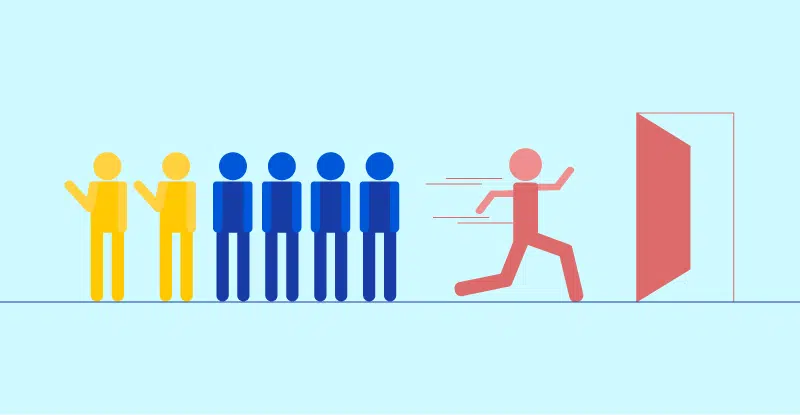
 [SourceImage](https://www.voxco.com/blog/everything-you-need-to-know-about-customer-churn/)

## K-Nearest Neighbors (KNN)
is a machine learning algorithm used for classification and regression tasks. In the context of predicting customer churn, you can use KNN to classify whether a customer is likely to churn or not based on certain features, such as "Tenure" (the length of time a customer has been with the company) and "TotalCharges" (the total charges incurred by the customer).

In [95]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
import os


Variable Descriptions¶
- gender --> Whether the customer is a male or a female
- SeniorCitizen --> Whether the customer is a senior citizen or not (1, 0)
- Partner --> Whether the customer has a partner or not (Yes, No)
- Dependents --> Whether the customer has dependents or not (Yes, No)
- tenure --> Number of months the customer has stayed with the company
- PhoneService --> Whether the customer has a phone service or not (Yes, No)
- MultipleLines --> Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService --> Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity --> Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup --> Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection --> Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport --> Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV --> Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies --> Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract --> The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling --> Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod --> The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges --> The amount charged to the customer monthly
- TotalCharges --> The total amount charged to the customer
- Churn --> Whether the customer churned or not (Yes or No)

In [17]:
churn_df = pd.read_csv('c:/kaggle/Input/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [18]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
churn_df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [20]:
# Checking the data types of all the columns
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [21]:
#convert type 
churn_df.TotalCharges = pd.to_numeric(churn_df.TotalCharges,errors='coerce')


In [22]:
#Removing missing values 
churn_df.dropna(inplace = True)

In [24]:
# #Remove customer IDs from the data set
churn_df.drop("customerID", axis=1, inplace=True)

In [26]:
churn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [29]:
categorical=(churn_df.dtypes =='object')
categorical_list = list(categorical[categorical].index)

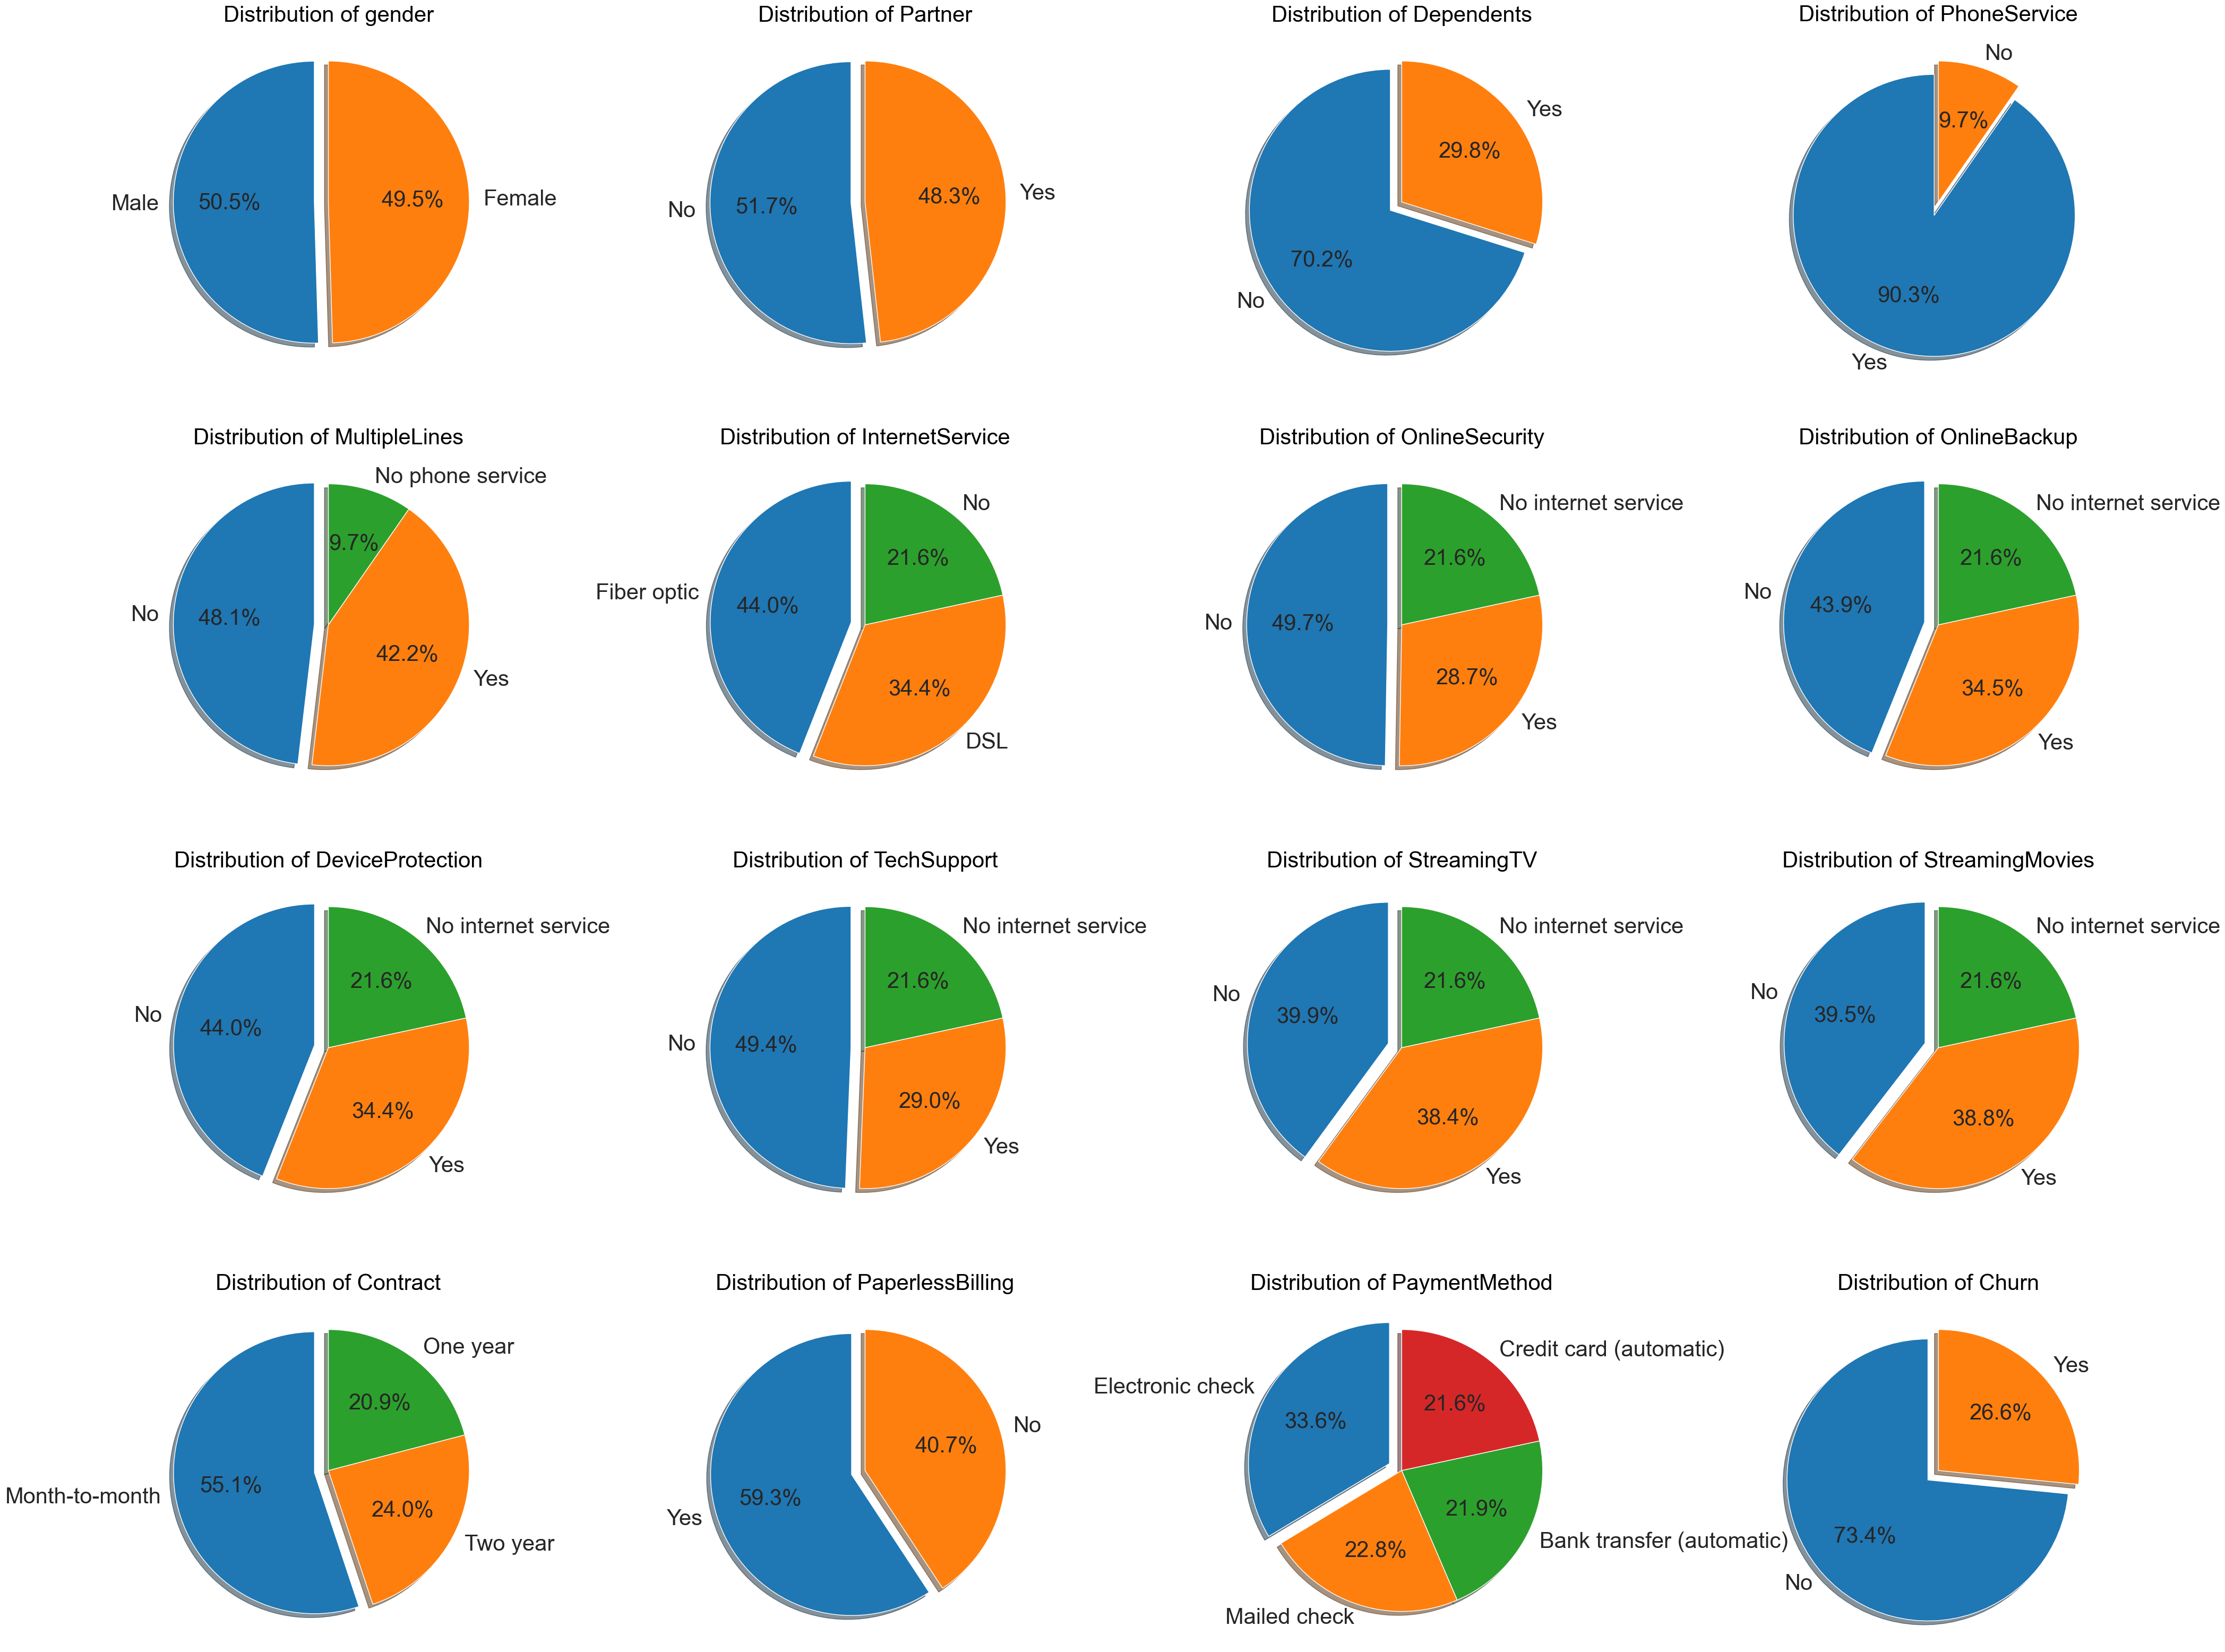

In [35]:
plt.figure(figsize=(50,50))
j = 0

for i in categorical_list:
   
    
    labels = churn_df[i].value_counts().index
    sizes = churn_df[i].value_counts().values
    
    unique = len(churn_df[i].unique())
    if(unique == 2):
        myexplode = [0.1, 0]
    if(unique == 3):
        myexplode = [0.1, 0,0]
    if(unique == 4):
        myexplode = [0.1,0,0,0]
    
    plt.subplot(5,4,j+1)
    plt.pie(sizes, labels=labels, explode = myexplode, shadow = True, startangle=90, autopct='%1.1f%%',textprops={'fontsize': 30})
    plt.title(f'Distribution of {i}',color = 'black',fontsize = 30)
    j += 1

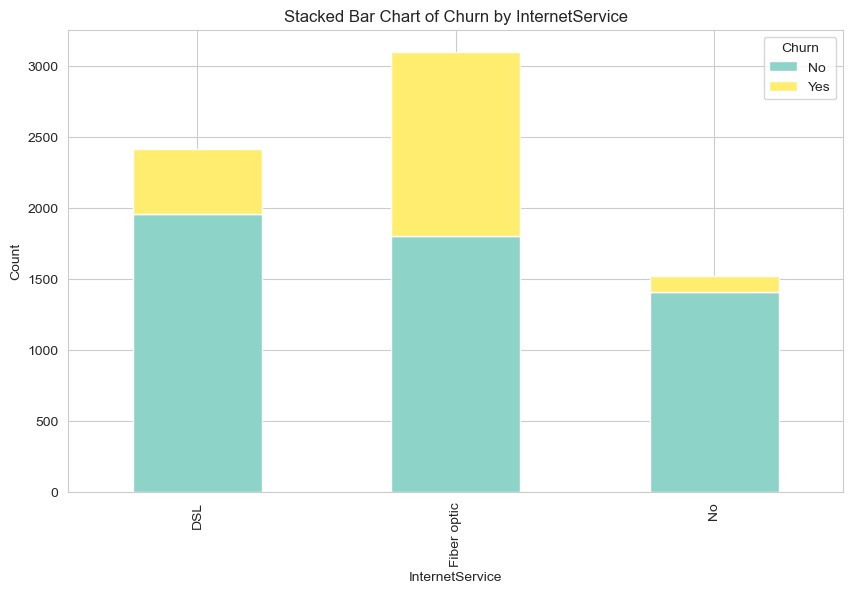

In [38]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called churn_df with 'InternetService' and 'Churn' columns

# Group the data by 'InternetService' and 'Churn' and count the occurrences
grouped = churn_df.groupby(['InternetService', 'Churn']).size().unstack()

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Plot the stacked bars
grouped.plot(kind='bar', stacked=True, ax=ax, colormap='Set3')

# Customize labels and title
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Churn by InternetService')

# Show the plot
plt.legend(title='Churn', loc='upper right')
plt.show()


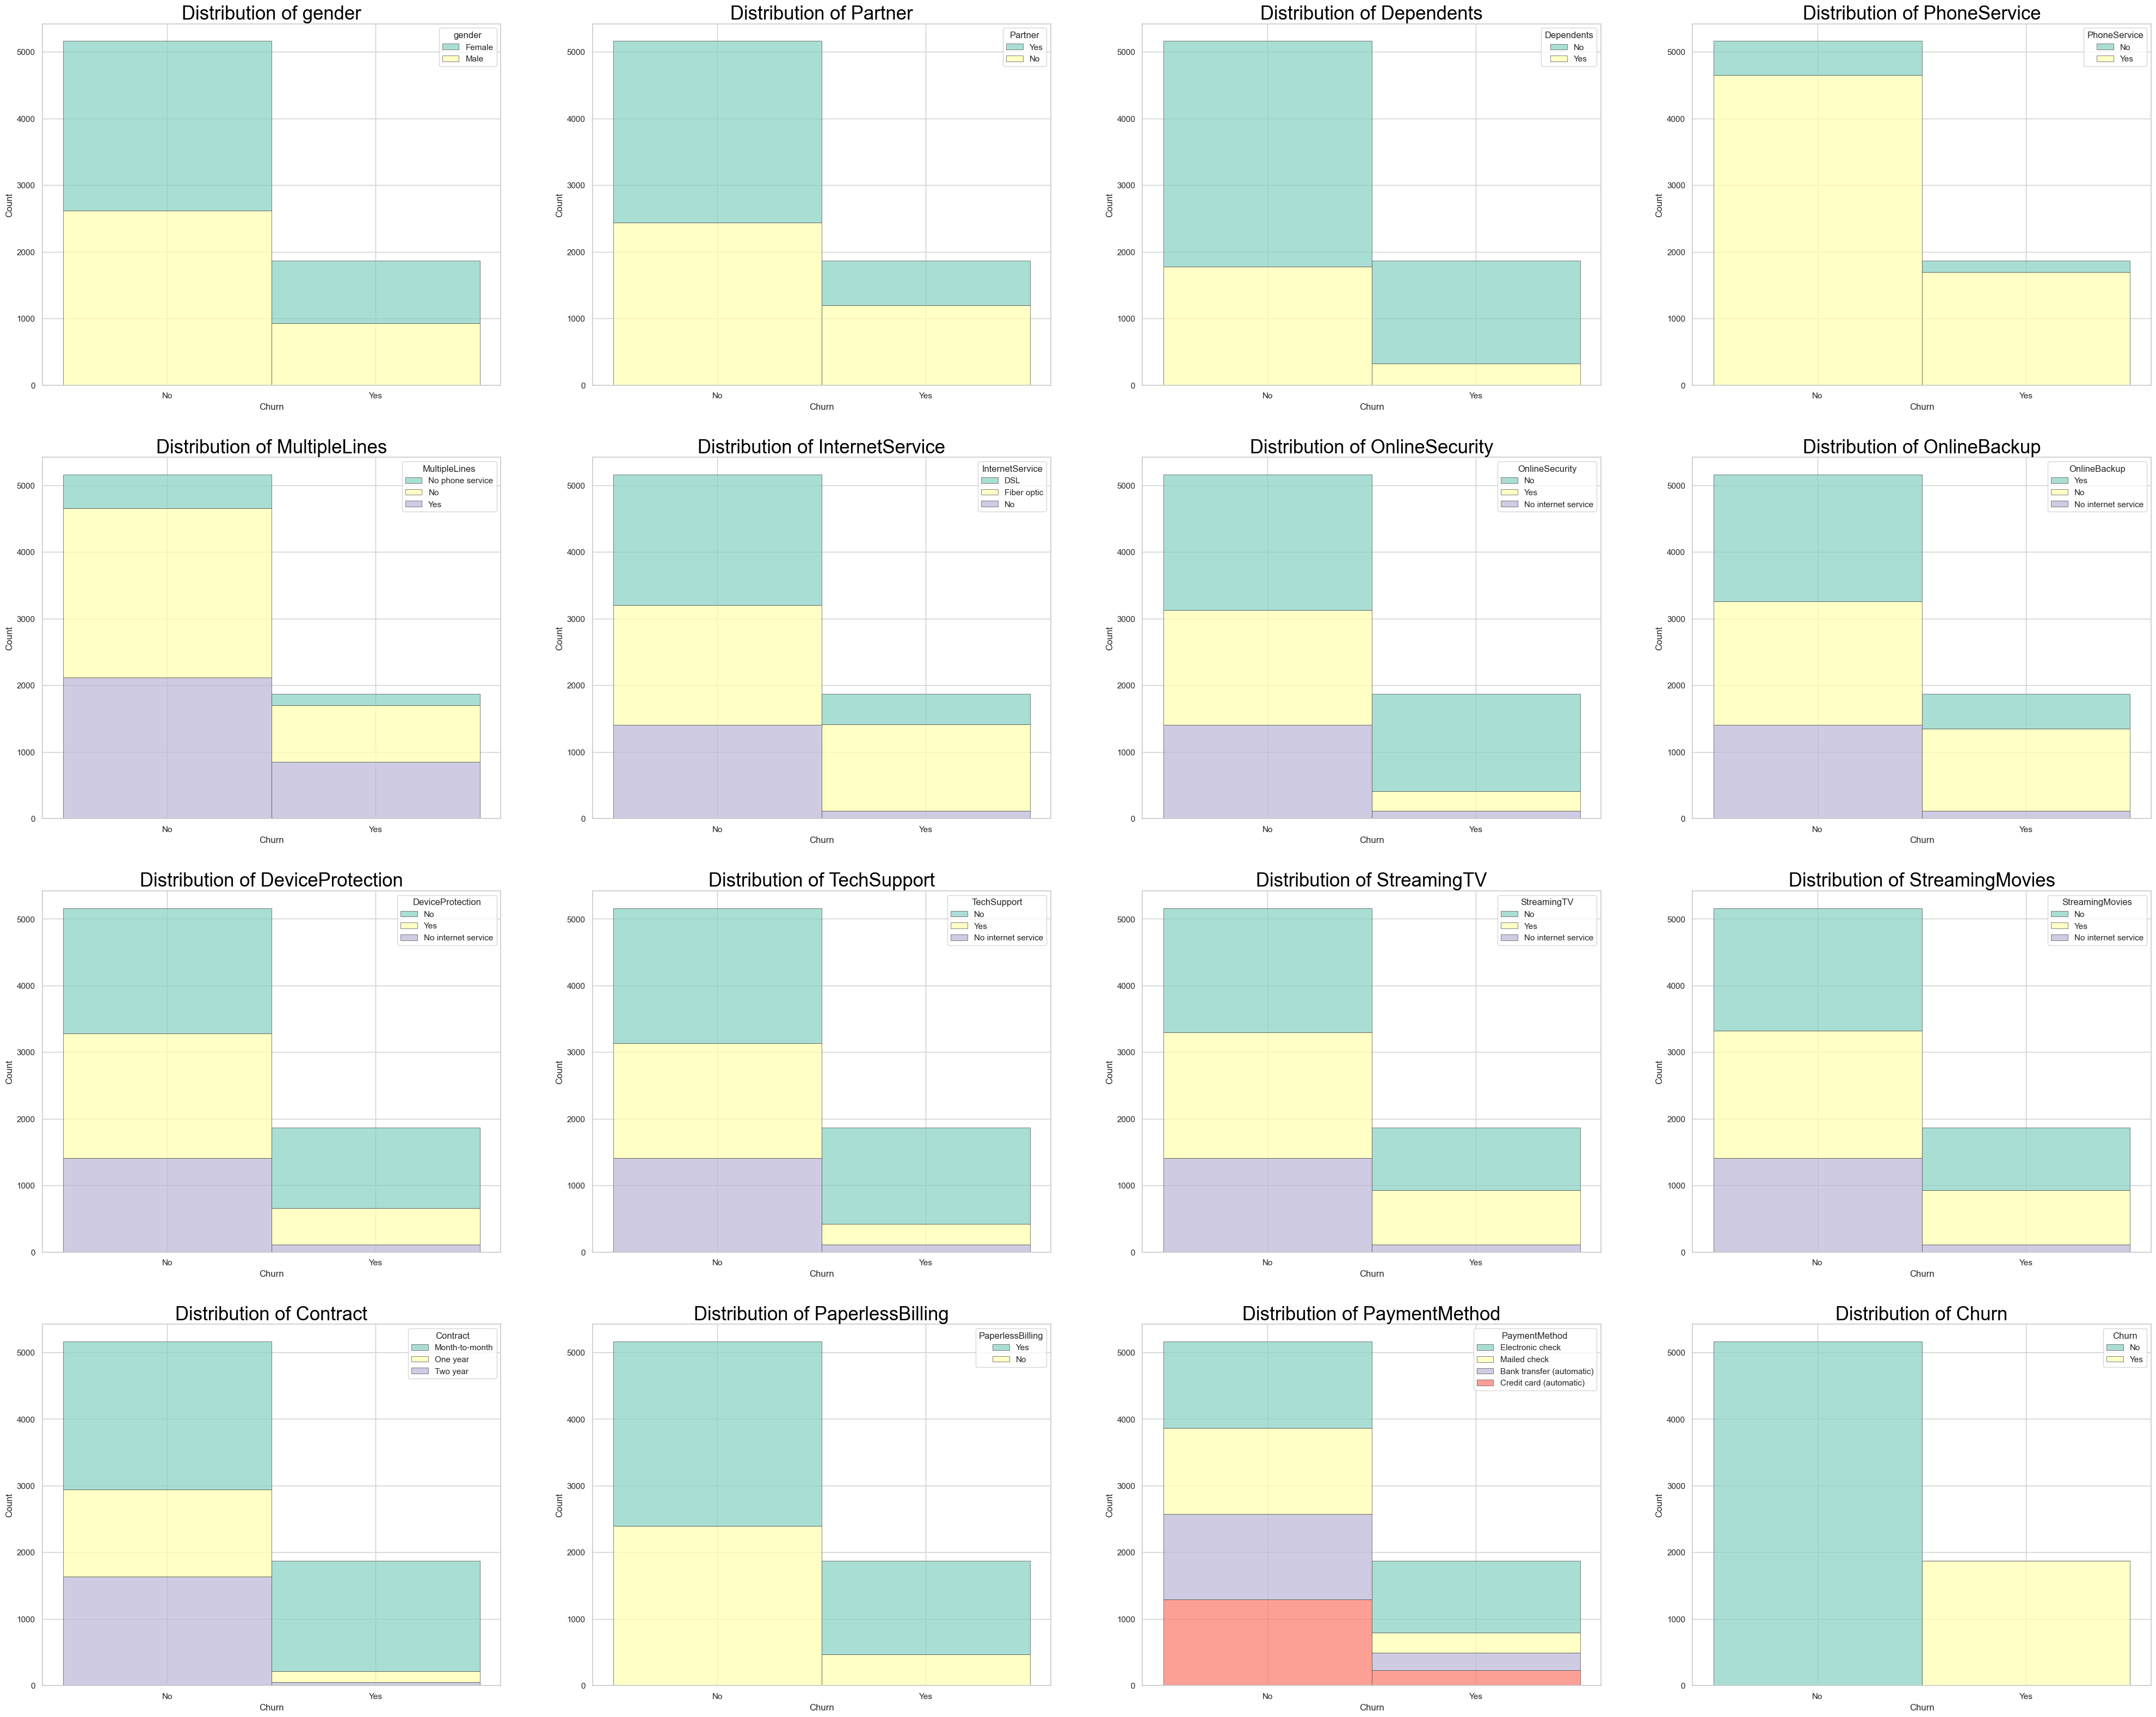

In [39]:
plt.figure(figsize=(50,50))
j = 0
sns.set_theme(style="whitegrid")
for i in categorical_list:
    
    plt.subplot(5,4,j+1)
    sns.histplot(churn_df, x="Churn",  hue=churn_df[i], multiple="stack", palette="Set3", edgecolor=".3", linewidth=.5)
    plt.title(f'Distribution of {i}',color = 'black',fontsize = 25)
    j += 1

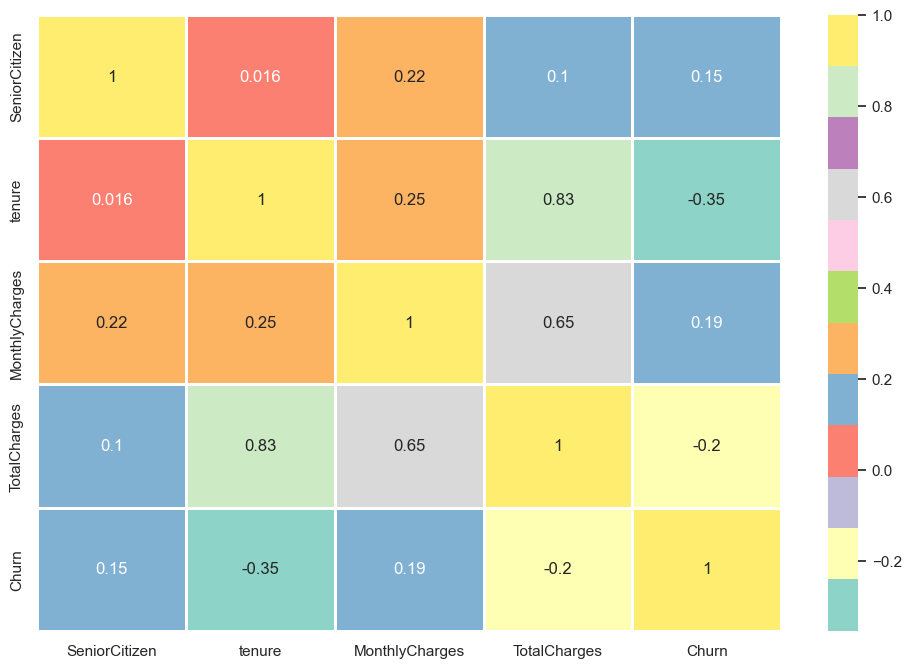

In [44]:
plt.figure(figsize=(12,8)) 
sns.heatmap(churn_df.corr(), annot=True, cmap='Set3', linewidths = 2)
plt.show()

In [40]:
#Convertin the predictor variable in a binary numeric variable
churn_df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
churn_df['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [41]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [45]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

In [47]:
# Create arrays for the features and the target variable
y = churn_df["Churn"].values
X = churn_df[["tenure", "TotalCharges"]].values

In [73]:
# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors= 5)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier()

In [74]:
X_new = np.array([[30, 17.5],
                  [107, 108.15],
                  [2, 151.65]])

In [75]:
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

In [76]:
# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

Predictions: [0 0 1]


<span style="color:blue; font-size:20px"> Measuring Model Performance</span>

<span style="color:blue; font-size:20px">Accuracy = correct predictions / total predictions</span>



In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=21,stratify=y)

In [78]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [79]:
print(knn.score(X_test,y_test))

0.7516587677725118


<span style="color:blue; font-size:20px">Complexity and over fitting </span>

In [93]:
train_accuracies= {}
test_accuracies= {}
neighbors= np.arange(1,26)
for neighbor in neighbors:
    knn=KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    train_accuracies[neighbor]=knn.score(X_train,y_train)
    test_accuracies[neighbor]=knn.score(X_test,y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25] 
 {1: 0.9867939861844779, 2: 0.8506704591629419, 3: 0.8500609508329947, 4: 0.8212108898821617, 5: 0.8191791954490044, 6: 0.809833401056481, 7: 0.8094270621698496, 8: 0.8006907761072735, 9: 0.7964242177976433, 10: 0.7901259650548558, 11: 0.7864689150751727, 12: 0.7809833401056481, 13: 0.7813896789922795, 14: 0.7799674928890695, 15: 0.7746850873628607, 16: 0.7773262901259651, 17: 0.7769199512393336, 18: 0.7793579845591223, 19: 0.7777326290125965, 20: 0.7767167817960179, 21: 0.7783421373425436, 22: 0.7718407151564405, 23: 0.7716375457131247, 24: 0.7720438845997561, 25: 0.7718407151564405} 
 {1: 0.6985781990521327, 2: 0.7374407582938388, 3: 0.7293838862559242, 4: 0.7606635071090048, 5: 0.7516587677725118, 6: 0.7559241706161137, 7: 0.7507109004739336, 8: 0.7563981042654029, 9: 0.7502369668246446, 10: 0.7644549763033175, 11: 0.7549763033175355, 12: 0.7606635071090048, 13: 0.7563981042654029, 14: 0.7559241706161137,

In [94]:

# Create a DataFrame from the dictionaries
results_df = pd.DataFrame({'Neighbor': neighbors, 'Train Accuracy': train_accuracies.values(), 'Test Accuracy': test_accuracies.values()})
# Display the DataFrame
print(results_df)

    Neighbor  Train Accuracy  Test Accuracy
0          1        0.986794       0.698578
1          2        0.850670       0.737441
2          3        0.850061       0.729384
3          4        0.821211       0.760664
4          5        0.819179       0.751659
5          6        0.809833       0.755924
6          7        0.809427       0.750711
7          8        0.800691       0.756398
8          9        0.796424       0.750237
9         10        0.790126       0.764455
10        11        0.786469       0.754976
11        12        0.780983       0.760664
12        13        0.781390       0.756398
13        14        0.779967       0.755924
14        15        0.774685       0.753555
15        16        0.777326       0.758768
16        17        0.776920       0.759716
17        18        0.779358       0.758768
18        19        0.777733       0.756872
19        20        0.776717       0.758294
20        21        0.778342       0.759242
21        22        0.771841    

<function matplotlib.pyplot.show(close=None, block=None)>

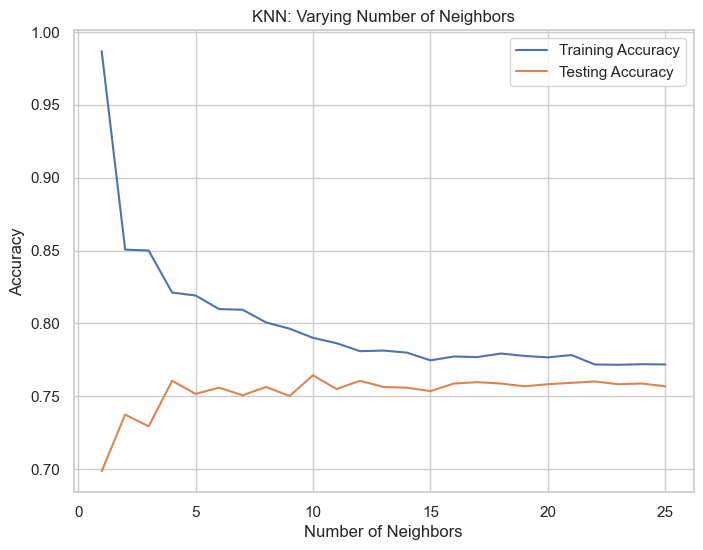

In [83]:
plt.figure(figsize=(8,6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors,train_accuracies.values(),label="Training Accuracy")
plt.plot(neighbors,test_accuracies.values(),label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show

In [90]:
# Create a KNN classifier with 6 neighbors
knn10 = KNeighborsClassifier(n_neighbors= 10)

In [91]:
knn10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [92]:
print(knn10.score(X_test,y_test))

0.7644549763033175
